# Lecture 21 - Clustering with K-Means

# K-Means Clustering Algorithm

K-Means algorithm is an iterative algorithm that tries to partition the dataset into $K$ pre-defined distinct non-overlapping subgroups (clusters) where each data point belongs to **only one group**. 

* K-Means Clustering is a centroid-based clustering.

* It tries to make the *inter-cluster* data points as similar as possible while also keeping the clusters as different (far) as possible.

* It assigns data points to a cluster such that the sum of the squared distance between the data points and the cluster's centroid (arithmetic mean of all data points that belong to that cluster) is at the minimum.

* The less variation we have within clusters, the more homogenous (similar) the data points are within the same cluster.

The **pseudo-code** is summarized as follows:

1. Specify number of clusters $K$

2. Initialize centroids by first shuffling the dataset amd then randomly selecting $K$ data points for the centroids without replacement. (There are different ways of initializing the centroids)

3. Keep iterating until there is no change to the centroids, i.e., assignment of data points to clusters isn't changing.
    * Compute the sum of the squared distance between data points and all centroids
    * Assign each data point to the closest cluster (centroid)
    * Compute the centroids for the clusters by taking the average of all data points that belong to each cluster

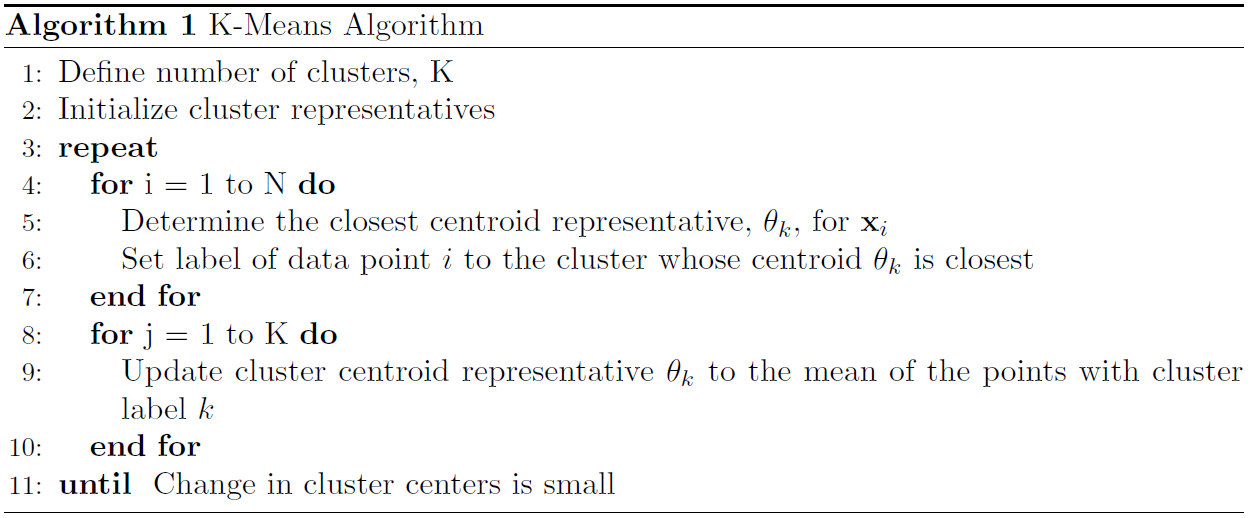

In [1]:
from IPython.display import Image
Image('figures/KMeans.png',width=800)

The K-Means algorithm uses **Expectation-Maximization (EM) as the optimization approach**:
* The E-Step assigns (hard) membership
* The M-step updates the representatives (centroids) for each cluster

As we learned before, optimization with EM is called **Alternating Optimization** and therefore the final solution will be **dependent** on the initialization (of cluster centroids). Therefore the final solution may not be the *optimal* solution.

* The objective function for the K-Means algorithm is:

\begin{align*}
J(\Theta,U) &= \sum_{i=1}^N\sum_{k=1}^K u_{ik} d^2\left(x_i, \theta_k\right)\\
&= \sum_{i=1}^N\sum_{k=1}^K u_{ik} \Vert x_i - \theta_k\Vert_2^2\\
\text{ such that } & u_{ik}\in\{0,1\}\text{ and }\sum_{k=1}^K u_{ik} = 1
\end{align*}

where $u_{ij}$ are cluster assignments, $\theta_j$ is the $j^{th}$ cluster representative and $d\left(x_i,\theta_k\right)$ is the distance between data point $x_i$ and cluster centroid $\theta_k$.

* In K-Means, we want to optimize:

\begin{align*}
\arg_{\Theta,U}\min J(\Theta,U)
\end{align*}

* If the **Euclidean distance** metric is used, does the K-means algorithm make any assumptions on cluster shape?
* Given a data set with an unknown number of clusters, can you come up with a strategy for determining the *right* number of clusters?
* Can we use other distance metrics in objective function $J(\Theta,U)$?

___

### Observations

1. Since K-Means uses distance-based measurements to determine the *similarity* between data points, it's recommended to **scale the data** since almost always the features in any data set would have different units of measurements (e.g. age vs income).

2. Given K-Means Alternating Optimization approach, different initializations may lead to different clusters, as K-Means algorithm may be stuck in a *local optima* and not converge to the *global optima*. Therefore, it's recommended to run the algorithm using different initializations of centroids and pick the results of the run that yielded the lower sum of squared distance.

3. One of the convergence criteria is to check whether the assignment of data points has not changed from one iteration to the next. This criteria of "assignment of points not changing" is the same as observing no change in the *within-cluster variation*:

\begin{align*}
\frac{1}{N_k}\sum_{i\in c_k} \Vert x_i - \theta_k\Vert_2^2
\end{align*}

___

## K-Means Applications

K-Means is a very popular algorithm and is commonly used in a variety of applications, such as: market segmentation, document clustering, image segmentation, image compression, etc.

The *goal* usually when we undergo a cluster analysis is either:

1. Get a meaningful intuition of the structure of the data we are dealing with.

2. Cluster-then-predict where different models will be built for different subgroups. An example of that is clustering patients into different subgroups (based on some feature map) and build a model for each subgroup to predict the probability of the risk of having a heart attack.

Let's take a look at two case applications for K-Means: Image Compression and Data Segmentation.

------------------------

Here is **K-Means explained in the SIMPLEST, SHORTEST, and MOST COMPLETE way**.
All points from your slides are covered.

---

# 🌟 **K-Means (Super Easy Summary)**

### **What is K-Means?**

A clustering algorithm that splits data into **K groups** where each point belongs to **only one group**.

---

# ⭐ **Key Ideas**

* It is **centroid-based** (each cluster has a center).
* Points inside the same cluster should be **similar**.
* Clusters should be **far apart** from each other.
* It minimizes the **sum of squared distances** between points and their cluster center.

---

# ⭐ **How K-Means Works (Pseudo-Code in Baby Language)**

1. **Choose K** (number of clusters)
2. **Pick K random points** as initial centroids
3. Repeat until nothing changes:

   * Assign each point to the **nearest centroid**
   * Move each centroid to the **average** of its assigned points

This repeats until centroids stop moving.

---

# ⭐ **Algorithm (Short Version)**

* **E-Step:** Assign each point to closest centroid
* **M-Step:** Recompute centroids (mean of points in each cluster)

This is called **Expectation-Maximization (EM)**.

---

# ⭐ **Objective Function (Simple Meaning)**

[
J(\Theta, U)=\sum (\text{distance between point and its centroid})^2
]

Goal:

### **Minimize total squared distances inside clusters.**

Each point belongs to exactly **1 cluster**.

---

# ⭐ **Assumptions**

* Uses **Euclidean distance**, so clusters are assumed to be **spherical/round-shaped**.
* Works best when clusters are **compact and separated**.

---

# ⭐ **Choosing K**

* K is unknown → use the **Elbow Method** or **Silhouette Score**.

---

# ⭐ **Other Distance Metrics?**

Possible, but classic K-Means works only with **Euclidean distance**.

---

# ⭐ **Important Observations**

1. Data should be **scaled** (because distance is sensitive to units).
2. Different initial centroids → different results.

   * K-Means can get stuck in **local optima**.
   * Run multiple times with different seeds.
3. Convergence = when **assignments stop changing** or **within-cluster variation stops decreasing**.

---

# ⭐ **Applications (Very Short)**

* Market segmentation
* Document clustering
* Image segmentation/compression
* Medical subgrouping
* Understanding structure of data
* Cluster → then build separate models per group

---

# 🎯 **Ultra-Short Summary**

K-Means splits data into K groups by repeatedly assigning points to the nearest center and updating centers as averages, minimizing squared distances. It uses Euclidean distance, needs scaling, may get stuck, and is widely used for segmentation and structure discovery.

---

If you want, I can also give:

📌 A one-page cheat sheet
📌 A hand-drawn visual explanation
📌 Python code with comments

Just tell me!


------------------------

### Example: K-Means as Data Segmentation

In [1]:
from scipy.spatial.distance import cdist
from numpy.random import permutation
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

In [2]:
def KMeans(X, K, MaxIter = 10_000, Thresh = 1e-5, metric='Euclidean', Visualization = True):
    '''This function implements K-Means algorithm. 
    Where the data X will be partitioned into K clusters.
    Data matrix X is of shape NxD, where N is the number of points and D the dimension of the data.'''

    #Initialize Cluster Centers by drawing Randomly from Data (can use other
    # methods for initialization...)
    N       = X.shape[0] #number of data points
    rp      = np.random.permutation(N); #random permutation of numbers 1:N
    centers = X[rp[:K],:]; #select first K data points sorted according to rp
    
    if Visualization:
        plt.subplot(1,2,1)
        plt.scatter(X[:,0],X[:,1],c='b')
        plt.plot(centers[:,0],centers[:,1],'xr',markersize=20)
        plt.title('Randomly select K='+str(K)+' data points as Centroids')
        plt.show()
    
    diff    = np.inf;
    iteration    = 0;
    while((diff > Thresh) & (iteration < MaxIter)):
        
        # Compute distances of every point to every centroid
        D   = cdist(X, centers, metric=metric) # N-by-K matrix
        
        #Assign data to closest cluster representative (using Euclidean distance)
        L   = np.argmin(D, axis=1) # for every row, find the index of the column with the smallest distance
        # N-by-1 vector with labels

        # Visualization
        if Visualization:
            fig = plt.figure(figsize=(10,5))
            plt.subplot(1,2,1)
            plt.scatter(X[:,0],X[:,1],c=L)
            plt.plot(centers[:,0],centers[:,1],'xr',markersize=20)
            plt.title('Membership Assignment')
            
        #Update cluster centers
        centersPrev = centers.copy()
        for i in range(K):
            centers[i,:] = np.mean(X[L==i,:], axis=0)

        # Visualization
        if Visualization:
            plt.subplot(1,2,2)
            plt.scatter(X[:,0],X[:,1],c=L)            
            plt.plot(centers[:,0],centers[:,1],'xr',markersize=20)
            plt.title('Update Cluster Centroids')
        
        #Update diff & iteration count for stopping criteria
        diff = np.linalg.norm(centersPrev - centers)
        iteration = iteration+1
    return centers, L

# Plotting function for synthetically generated data
def Plotting(X, true_labels, L, name):
    fig = plt.figure(figsize=(12,4))
    if len(true_labels)>0:
        fig.add_subplot(1,2,1)
        plt.scatter(X[:,0],X[:,1],c=true_labels)
        plt.title(name)
    else:
        fig.add_subplot(1,2,1)
        plt.scatter(X[:,0],X[:,1],c='b')
        plt.title(name)
    fig.add_subplot(1,2,2)
    plt.scatter(X[:, 0], X[:, 1], c=L)
    plt.title("K-Means Clustering Results")

In [3]:
from sklearn import datasets

# Create synthetically generate data
n_samples = 1500
X1, T1 = datasets.make_blobs(n_samples=n_samples,centers=3,cluster_std=1)               # Blobs data
X2, T2 = datasets.make_blobs(n_samples=n_samples,cluster_std=[1.0, 2.5, 0.5],centers=3) # Different Variance Blobs data
X3, T3 = datasets.make_moons(n_samples=n_samples, noise=.05)                            # Moons data
X4, T4 = datasets.make_circles(n_samples, noise=.05, factor=0.5)                        # Circles data
X5     = np.dot(X1, [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]])             # Anisotropicly distributed data
T5     = T1
X6     = np.vstack((X1[T1 == 0][:500], X1[T1 == 1][:100], X1[T1 == 2][:10]))            # Unevenly sized Blobs data
T6     = np.hstack((np.zeros(500),np.ones(100),2*np.ones(10)))

membership assignment

For every data point:

Compute distance to every centroid

Pick the closest centroid

Assign the point to that cluster

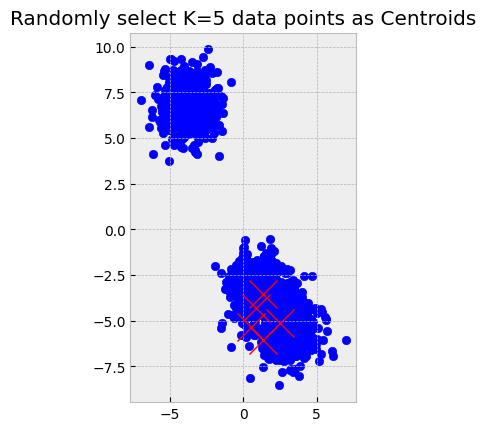

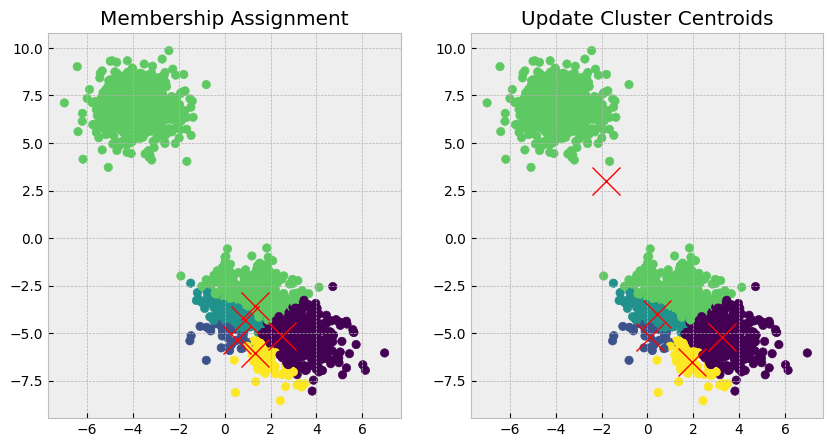

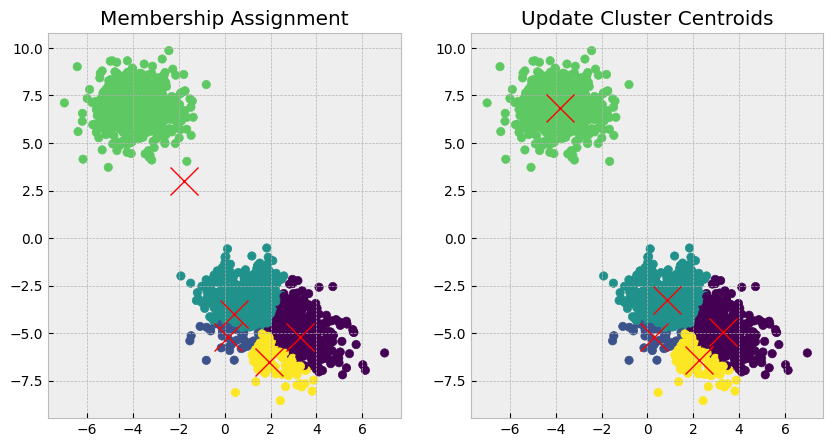

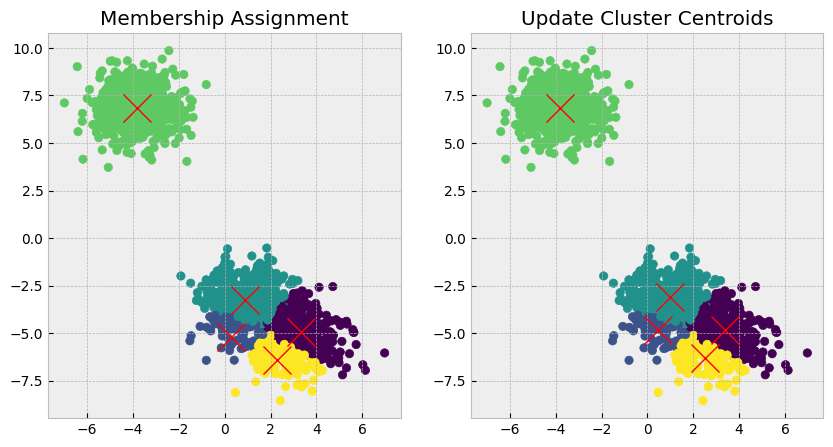

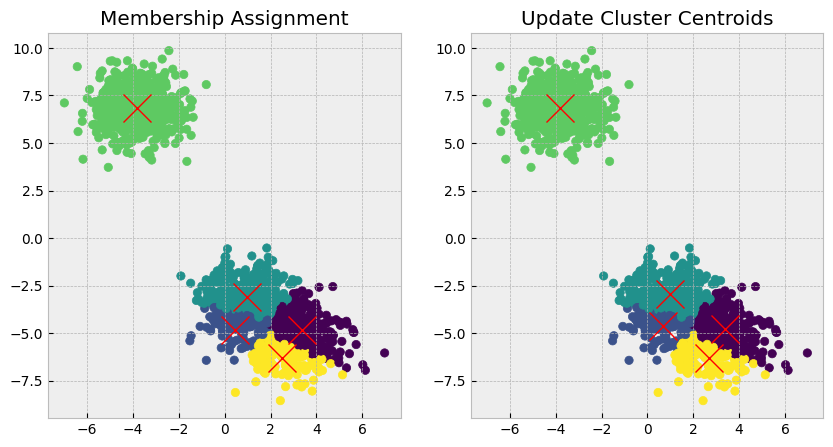

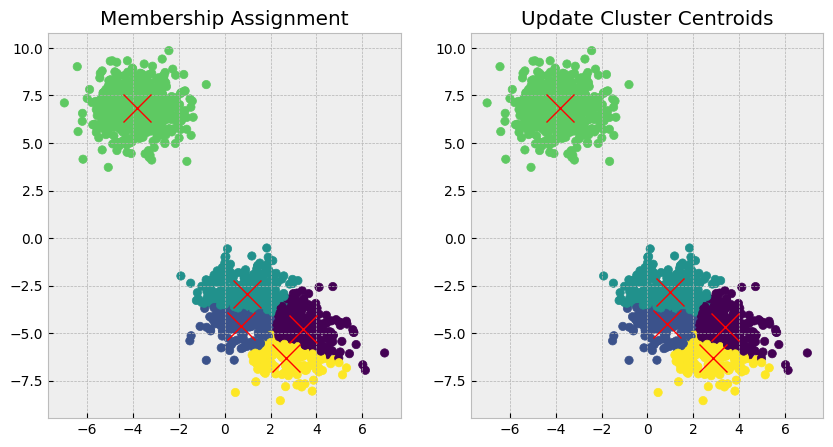

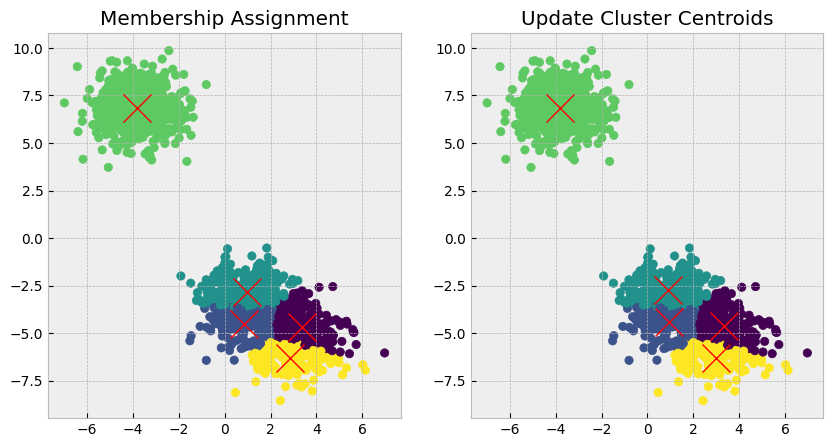

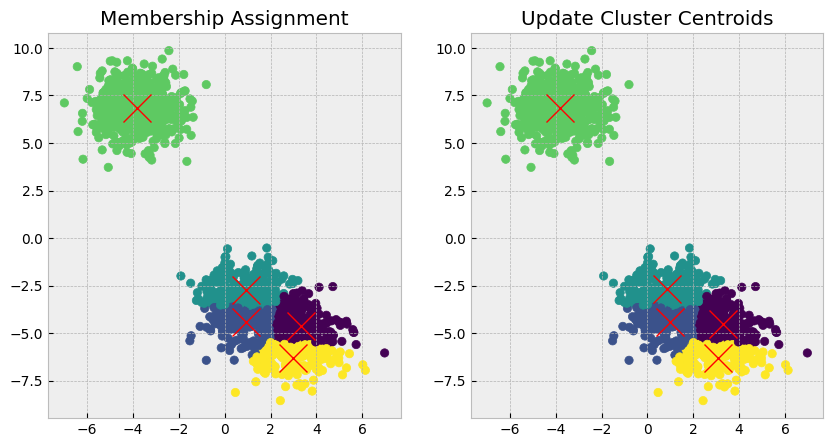

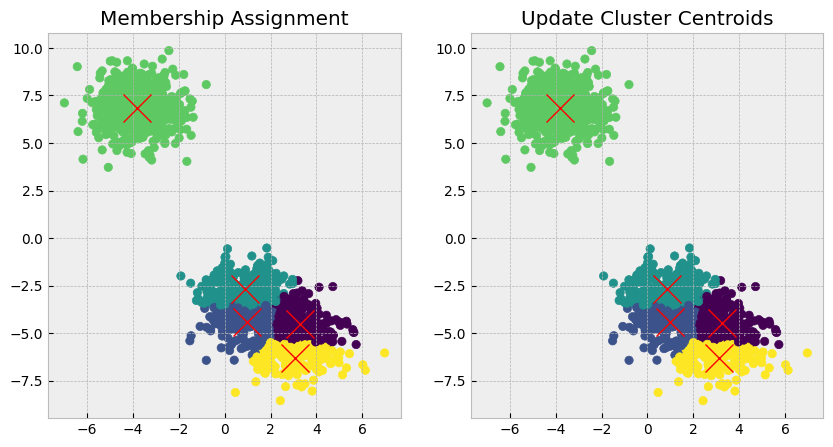

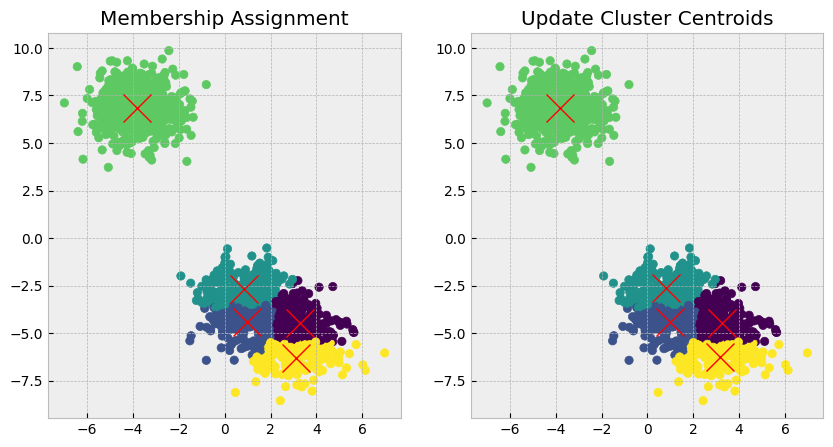

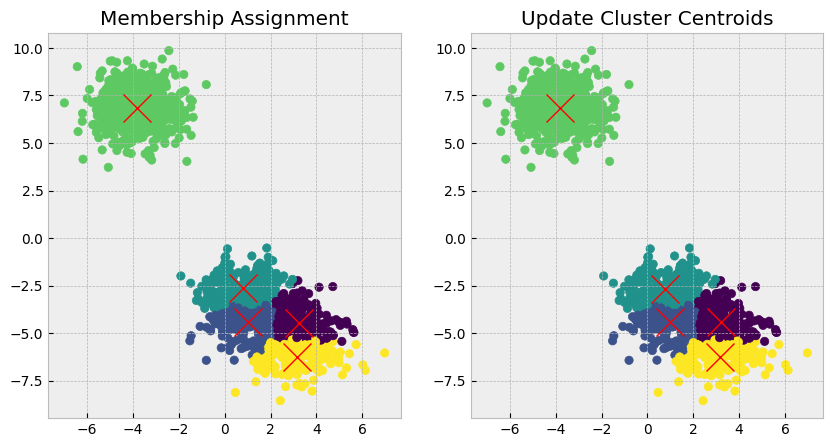

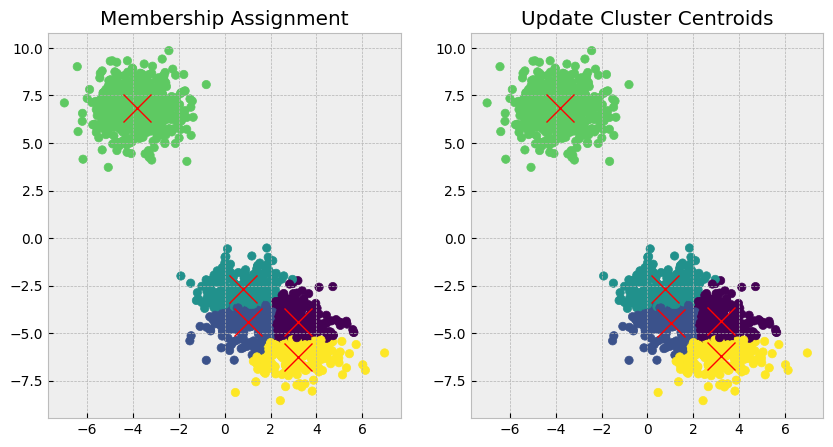

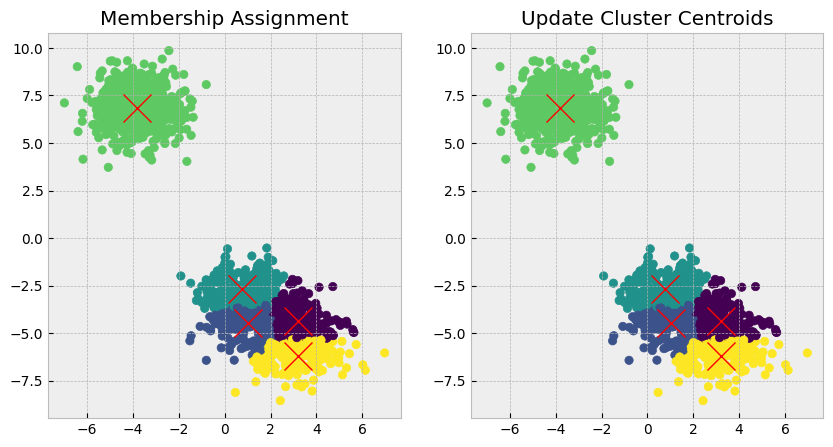

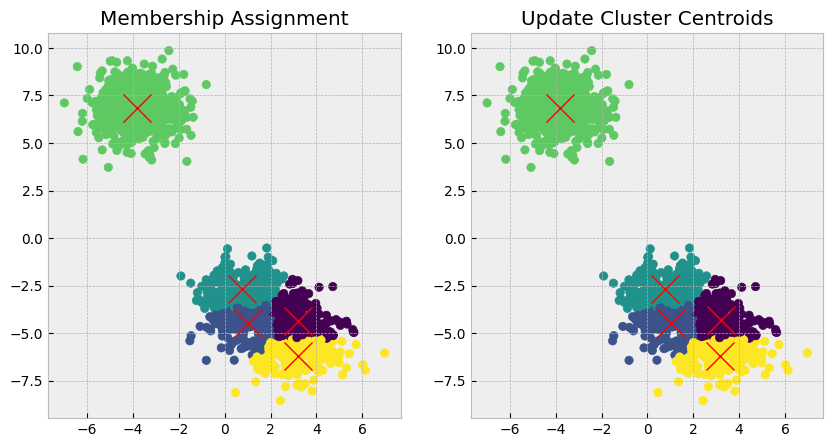

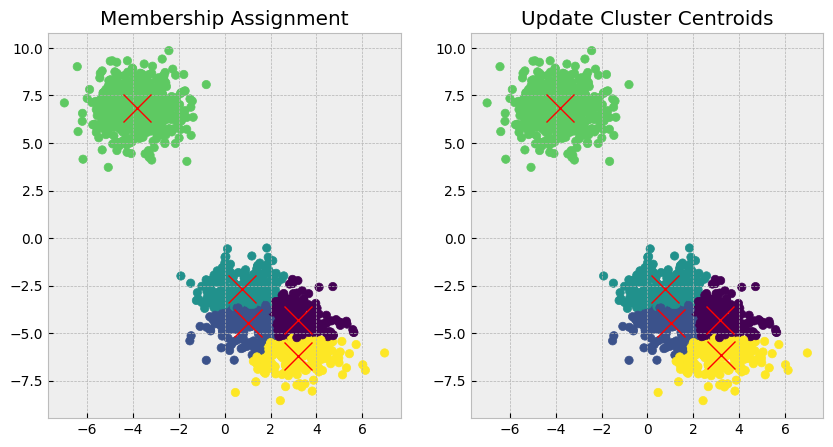

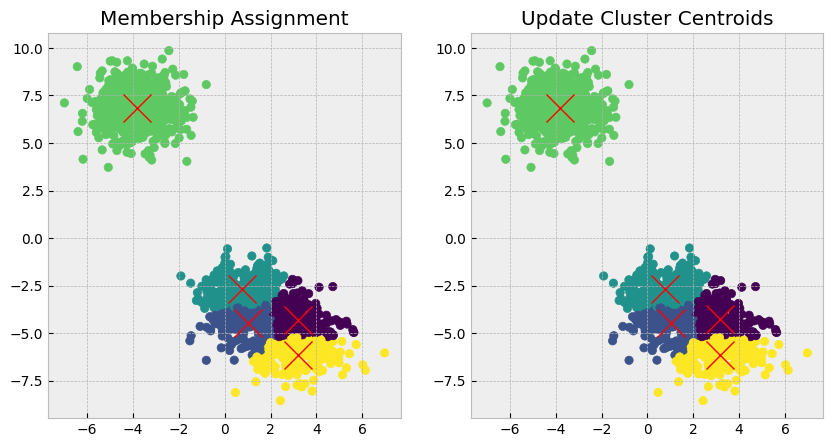

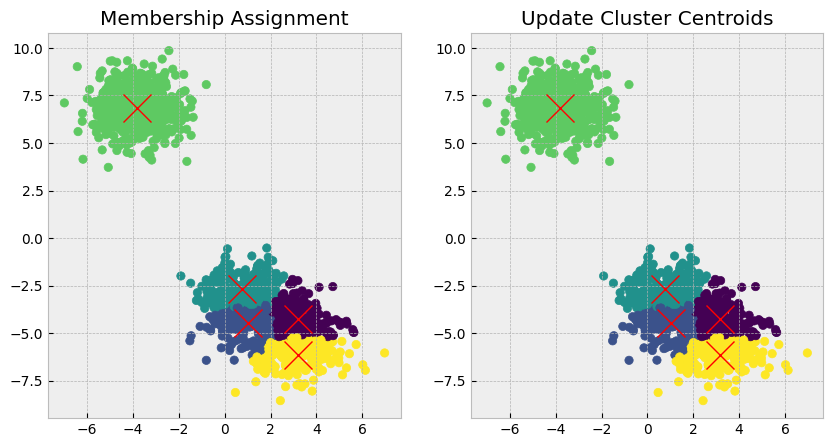

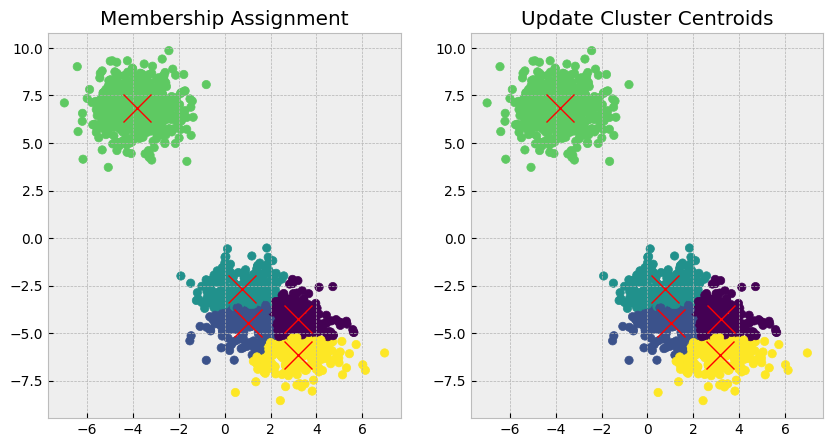

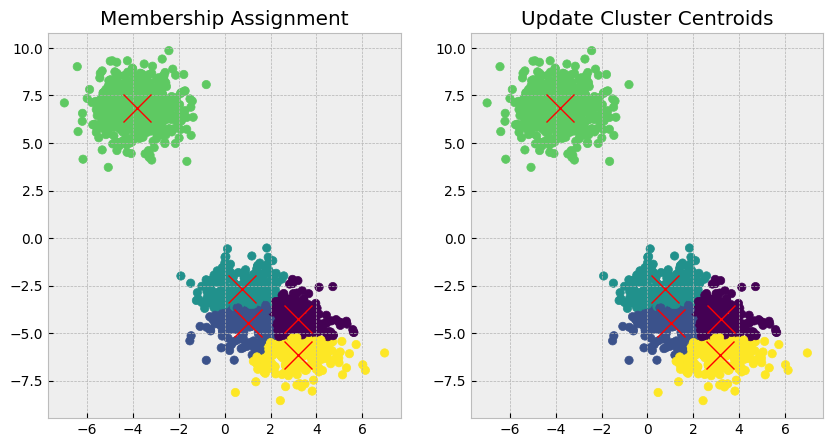

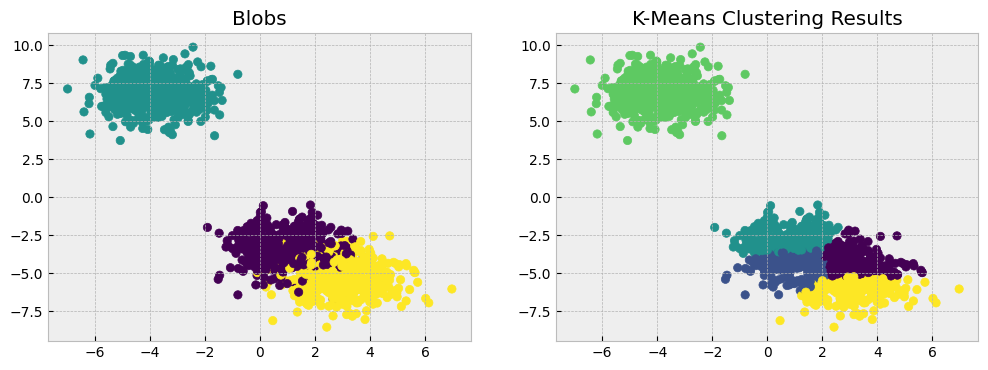

In [4]:
NoClusters = 5
C1, L1 = KMeans(X1, NoClusters, Visualization = True)
Plotting(X1, T1, L1, 'Blobs')

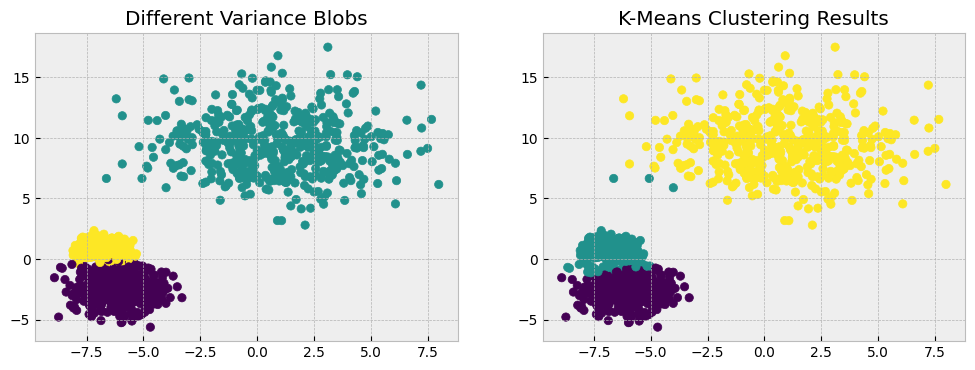

In [5]:
NoClusters = 3
C2, L2 = KMeans(X2, NoClusters, Visualization = False)
Plotting(X2, T2, L2, 'Different Variance Blobs')

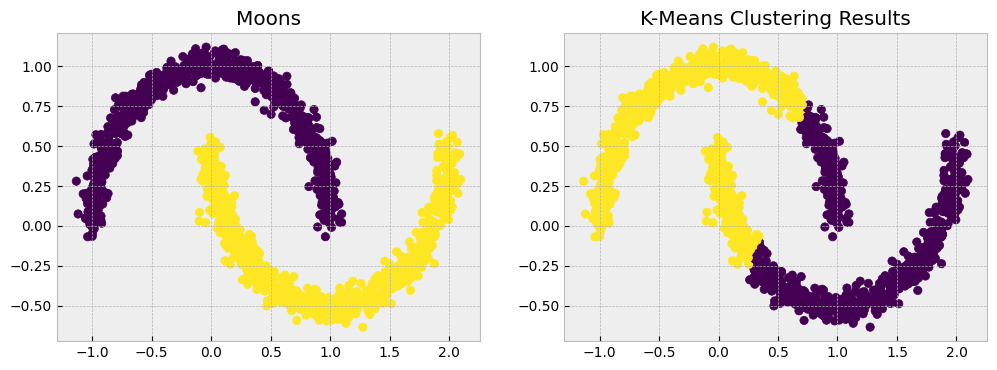

In [6]:
NoClusters = 2
C3, L3 = KMeans(X3, NoClusters, Visualization = False)
Plotting(X3, T3, L3, 'Moons')

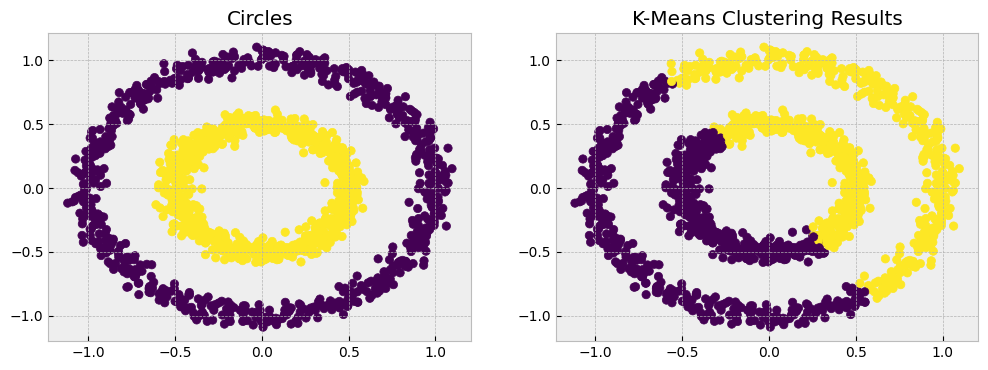

In [7]:
NoClusters = 2
C4, L4 = KMeans(X4, NoClusters, Visualization = False)
Plotting(X4, T4, L4, 'Circles')

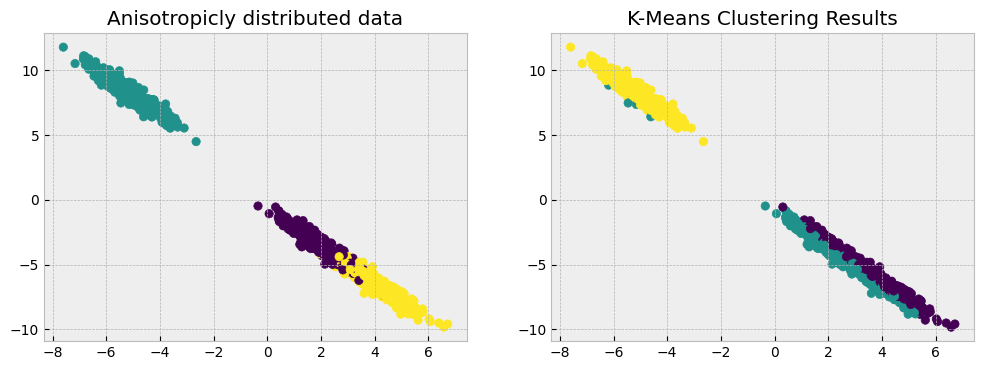

In [8]:
NoClusters = 3
C5, L5 = KMeans(X5, NoClusters, metric='mahalanobis', Visualization = False)
Plotting(X5, T1, L5, 'Anisotropicly distributed data')

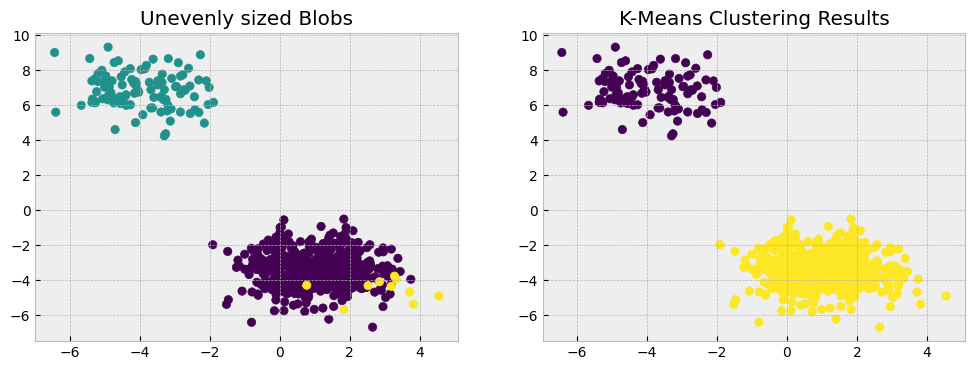

In [9]:
NoClusters = 2
C6, L6 = KMeans(X6, NoClusters, Visualization = False)
Plotting(X6, T6, L6, 'Unevenly sized Blobs')

___